
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>

In [ ]:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades ! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

# PROYECCION DE JUEGOS

### En este proyecto, se pretende pronosticar la vente de juegos para el siguiente año (2017), para ello, se obtendrán patrones para poder decidir los juegos que podrían tener más ventas. 

En general se relizará:

- Cargar el archivo y observar su información general.
- Preparar los datos: de acuerdo a la información, se realizarán los cambios necesarios para trabajar correctamente con los datos.
- Análisis de datos: con los datos preparados, se obtendrán algunas métricas como los años de mayor venta en general, las plataformas y juegos más vendidos, las plataformas que aún se encuentran en el mercado, entre otras.
- Usuarios por región: donde se obtendrán algunas métricas al punto anterior pero categorizadas por región.
- Pruebas de hipótesis: se comparará las calificaciones promedio de los usuarios de 2 plataformas y las calificaciones promedio de los usuarios de 2 géneros.

## Cargar archivo e información general

### En este punto sólo se importarán las librerías a utilizar y se caragará el archivo para revisar su información general.

In [1]:
import pandas as pd #Se cargan las librerías a utilizar
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
juegos = pd.read_csv('/datasets/games.csv') #Se carga el archivo
juegos.info() #Para conocer la información general del DataFrame
juegos.head() #Para darse una idea de la distribución del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda que es muy importante analizar si hay duplicados o no en los datos. Puedes utilizar _duplicated().sum()_ para ver el número de duplicados.

</div>

## Preparar datos

### De acuerdo a la información obtenida, se realizará lo siguiente:

- Se convertirán los nombres de las columnas a la convención snake_case.
- La columna user_score tiene un tipo de dato incorrecto, se convertirá a float.
- Al convertir la columna user_score se colocará errors='cource' por la abrviatura 'tbd' que contienen algunas filas.

In [3]:
juegos.columns = juegos.columns.str.lower() #Convierte los nombres de las columnas a minúsculas
juegos['user_score'] = pd.to_numeric(juegos['user_score'], errors='coerce') #Convierte la columan user_score a tipo float
juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Se ha realizado el ajuste en el nombre de las columnas de forma correcta. 

</div>

### Sólo las columnas de la plataforma y las ventas no tienen valores ausentes, para las demás columnas se tratarán de la siguiente manera:
- Se sustituirán los valores ausentes por 'no_info' para las columnas 'name', 'genre' y 'rating'.
- Se mantendrán los valores ausentes en las columnas 'year_of_release', 'critic_score' y 'user_score' para no cambiar el tipo de dato. Además, en las últimas 2 columnas no se pueden colocar 0 debido a que modificaría los datos estadísticos.

In [4]:
columnas_a_reemplazar = ['name', 'genre', 'rating'] #Coloco las columnas donde se modificaran los valores ausentes en una variable

for col in columnas_a_reemplazar:
    juegos[col] = juegos[col].fillna('no_info') #Reemplaza los valores ausentes en las columnas de la lista columnas_a_reemplazar por el string 'no_info'

juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo! Soluciones válidas en este caso para manejar los nulos serían:

- Introducir un valor irreal que depende de la columna y su significado (-1, -999999, etc.).
- Dejar los huecos sin cambios.

Los valores de Year_of_release se pueden cambiar a cero o eliminarse. Por su parte, no hay mucho que se puede hacer con los valores nulos de critic_score y user_score, los cuales se pueden dejar a null.

</div>

### Se agregará la suma total de ventas por juego en la columna 'total_sales' sumando las ventas de Norteamérica, Europa, Japón y lo de otros países ('other_sales').

In [5]:
juegos['total_sales'] = juegos[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) #Se agrega la columna 'total_sales' con la suma total de ingresos por juego
juegos.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_info,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_info,31.38


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen trabajo calculando las ventas totales.

</div>

## Análisis de datos

### Para observar los juegos por año, se realizará un gráfico de barras

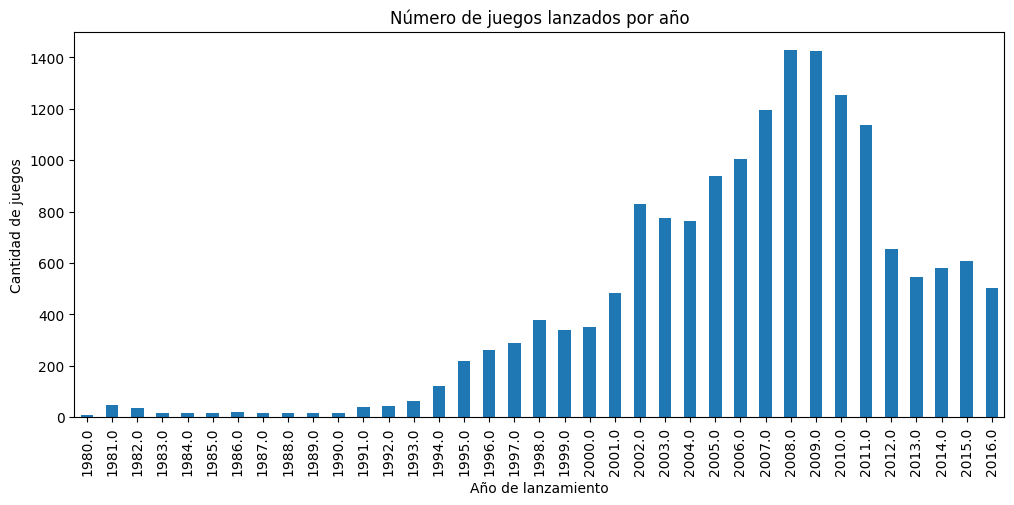

In [6]:
juegos['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12,5)) #Cuenta los juegos por año y los muestra en un gráfico de barras
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.show()

### Observaciones:

- Se observa un aumento de juegos en 1994, aunque de 2002 a 2011 son los años de mayor cantidad de juegos lanzados.
- A partir de 2012 disminuyen los lanzamientos hasta 2016 (o quizá, no se tengan los datos completos), siendo el año con menor cantidad de lanzamientos desde 2002.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen análisis sobre el lanzamiento de los videojuegos. Además, el gráfico utilizado es excelente y las conclusiones se presentan claramente.

</div>

### Para tener claro los 5 juegos de mayor volumen de venta, se realizará un gráfico de áreas:

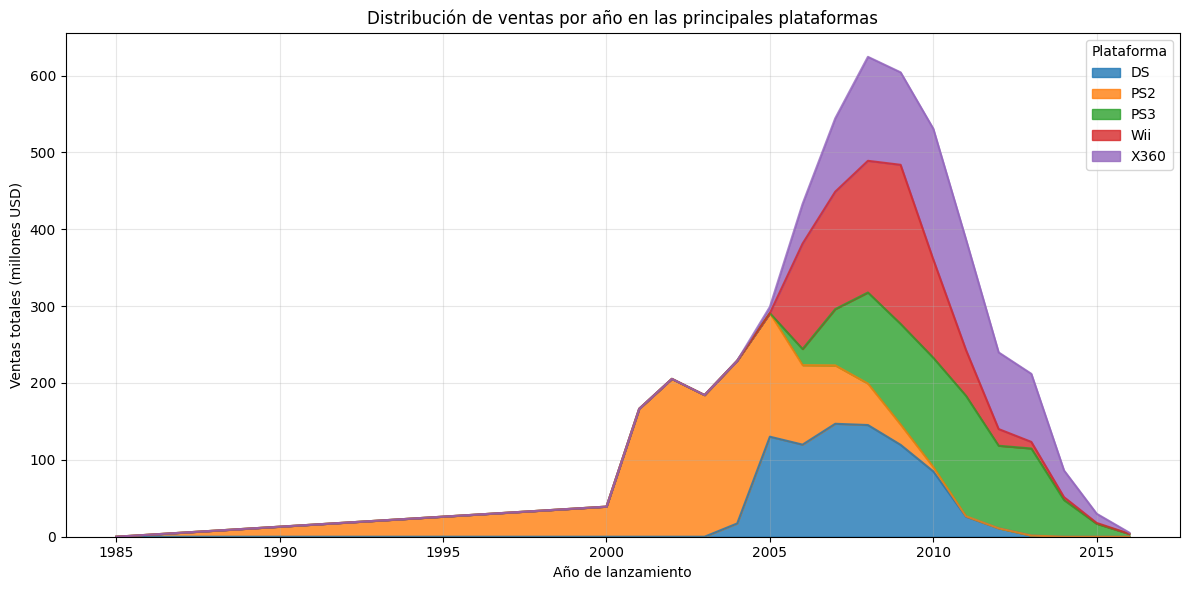

In [7]:
top_plataformas = (juegos.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index) # Identifica las plataformas con mayores ventas totales

top_juegos = juegos[juegos['platform'].isin(top_plataformas)] # Filtrar los juegos en top_plataformas

ventas_año_plataforma = (top_juegos.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)) #Agrupa y suma por año las ventas totales por plataforma

ventas_año_plataforma.plot(kind='area', stacked=True, figsize=(12,6), alpha=0.8) #Crea el gráfico de área con las 5 plataformas 

plt.title('Distribución de ventas por año en las principales plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones USD)')
plt.legend(title='Plataforma', loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico muestra claramente la evolución de las ventas anuales por plataforma. Las conclusiones asociadas se presentan claramente. 

</div>

### Observaciones:

- El mayor volumen de ventas por plataforma es la X360.
- El año con más ventas de las 2 principales es 2018.
- Para las plataformas DS y PS2 ya no hay ventas después de 2014 (aproximadamnete).

### De acuerdo al punto anterior, se determinarán las plataformas que ya no tienen ventas en la actualidad:

In [8]:
año_minimo, año_maximo = juegos['year_of_release'].min(), juegos['year_of_release'].max() #Crea 2 variables con el año mínimo y máximo respectivamente
print(f"Rango de años en los datos: {int(año_minimo)} - {int(año_maximo)}")

venta_plataforma = (juegos.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()) # Agrupa por plataforma y año
ultimo_año = venta_plataforma['year_of_release'].max() # Determina el año más reciente con datos por plataforma
ultimo_año_ventas = (venta_plataforma[venta_plataforma['total_sales'] > 0].groupby('platform')['year_of_release'].max()) # Identifica el último año con ventas de cada plataforma
plataformas_inactivas = ultimo_año_ventas[ultimo_año_ventas < ultimo_año].index.tolist() # Identifica las plataformas que ya no venden

print("Plataformas que solían ser populares pero ya no tienen ventas:")
print(plataformas_inactivas)

Rango de años en los datos: 1980 - 2016
Plataformas que solían ser populares pero ya no tienen ventas:
['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB']


### Como se mencionó anteriormente, vemos que 2 de las 5 plataformas con mayor volumne de venta ya no están activas

### Observemos cual es el promedio que tarda una plataforma en desaparecer (dejar de vender):

In [9]:
plataforma_ciclo_vida = (venta_plataforma[venta_plataforma['total_sales'] > 0].groupby('platform')['year_of_release'].agg(['min', 'max']).rename(columns={'min': 'año_inicio', 'max': 'año_fin'})) #Da el año de inicio, fin y duración por plataforma
plataforma_ciclo_vida['duracion_activa'] = (plataforma_ciclo_vida['año_fin'] - plataforma_ciclo_vida['año_inicio']) # Calcula el ciclo de vida
promedio_duracion = plataforma_ciclo_vida['duracion_activa'].mean() #Calcula el promedio del ciclo de vida por plataforma
años_entre_nuevas = (plataforma_ciclo_vida['año_inicio'].sort_values().diff().mean()) #Calcula el promedio de tiempo que tarda una nueva plataforma en aparecer

print("Promedio de duración activa de una plataforma:", promedio_duracion, "años")
print("\nTiempo promedio entre la aparición de nuevas plataformas:", años_entre_nuevas, "años")
print("\nResumen del ciclo de vida por plataforma:")
print(plataforma_ciclo_vida.sort_values('año_inicio'))

Promedio de duración activa de una plataforma: 7.612903225806452 años

Tiempo promedio entre la aparición de nuevas plataformas: 1.1 años

Resumen del ciclo de vida por plataforma:
          año_inicio  año_fin  duracion_activa
platform                                      
2600          1980.0   1989.0              9.0
NES           1983.0   1994.0             11.0
DS            1985.0   2013.0             28.0
PC            1985.0   2016.0             31.0
GB            1988.0   2001.0             13.0
SNES          1990.0   1999.0              9.0
GEN           1990.0   1994.0              4.0
GG            1992.0   1992.0              0.0
SCD           1993.0   1994.0              1.0
NG            1993.0   1996.0              3.0
SAT           1994.0   1999.0              5.0
PS            1994.0   2003.0              9.0
3DO           1994.0   1995.0              1.0
TG16          1995.0   1995.0              0.0
PCFX          1996.0   1996.0              0.0
N64           1996.0

### Observaciones:

- El tiempo promedio del ciclo de vida es de 7.6 años, el mayor tiempo activo de una plataforma es de 31 años (PC), quien sigue activa.
- El timepo promedio en aparecer nuevas plataformas es de sólo 1.1 años, aunque hay un salto enorme de 5 años entre el Wii y el 3DS.
- Actualmente, hay 9 plataformas activas entre las cuales se encuentra 3 del top 5 en ventas.
- De las 9 activas, 4 de ellas están por encima del promedio del ciclo de vida.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Realizas un análisis correcto del ciclo de vida de las consolas. La gráfica es clara y respalda tus conclusiones.

</div>

### De acuerdo a las observaciones anteriores, sólo se considerará para la proyección de ventas del 2006 al 2016.

In [10]:
proyeccion_2027 = juegos[(juegos['year_of_release'] >= 2006) & (juegos['year_of_release'] <= 2016)] #Selecciona las filas de 2006 a 2016

print(f"Datos seleccionados: {proyeccion_2027['year_of_release'].min()} - {proyeccion_2027['year_of_release'].max()}")
print(f"Número de registros: {len(proyeccion_2027)}")

Datos seleccionados: 2006.0 - 2016.0
Número de registros: 10333


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

No es común utilizar datos de más de 2-3 años al hacer una proyección de ventas para el próximo año, incluso en negocios tradicionales. En la dinámica industria de los videojuegos, tomar intervalos de tiempo más largos debería evitarse, ya que definitivamente conducirá a rastrear tendencias obsoletas. Pero tampoco deberías tomar un período demasiado corto.

</div>

### Se calcularán las ventas por plataforma de los años considerados para la proyección:

In [11]:
ventas_plataforma_proyeccion_2017 = (proyeccion_2027.groupby('platform')['total_sales'].sum().sort_values(ascending=False)) # Total acumulado por plataforma

print(ventas_plataforma_proyeccion_2017.head(10))

platform
X360    952.99
PS3     931.34
Wii     891.18
DS      655.35
PS4     314.14
PS2     265.80
3DS     257.81
PSP     238.63
PC      163.42
XOne    159.32
Name: total_sales, dtype: float64


### Revisaremos las ventas de las plataformas recientes

In [12]:
tendencia_ventas = (proyeccion_2027.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()) #Agrupa por año y plataforma los ventas de los años de proyeccion

recientes = tendencia_ventas[tendencia_ventas['year_of_release'] >= 2014] # Tomar promedio de ventas en los últimos 3 años (2014-2016)
tendencia_recientes = (recientes.groupby('platform')['total_sales'].mean().sort_values(ascending=False)) #Agrupa por plataforma las ventas y calcula el promedio
print(tendencia_recientes.head(10))

platform
PS4     96.050000
XOne    46.786667
3DS     28.893333
PS3     22.726667
X360    16.073333
WiiU    14.326667
PC       9.016667
PSV      7.466667
Wii      1.690000
PSP      0.180000
Name: total_sales, dtype: float64


### Observamos que en los últimos 3 años, el top 3 de las plataformas de mayor venta son la PS4, XOne y 3DS, que superan a las 3 plataformas del top 5 de ventas de todos los tiempos, las cuales van a la baja.

### Veamos el comportamiento de las 5 principales de forma gráfica

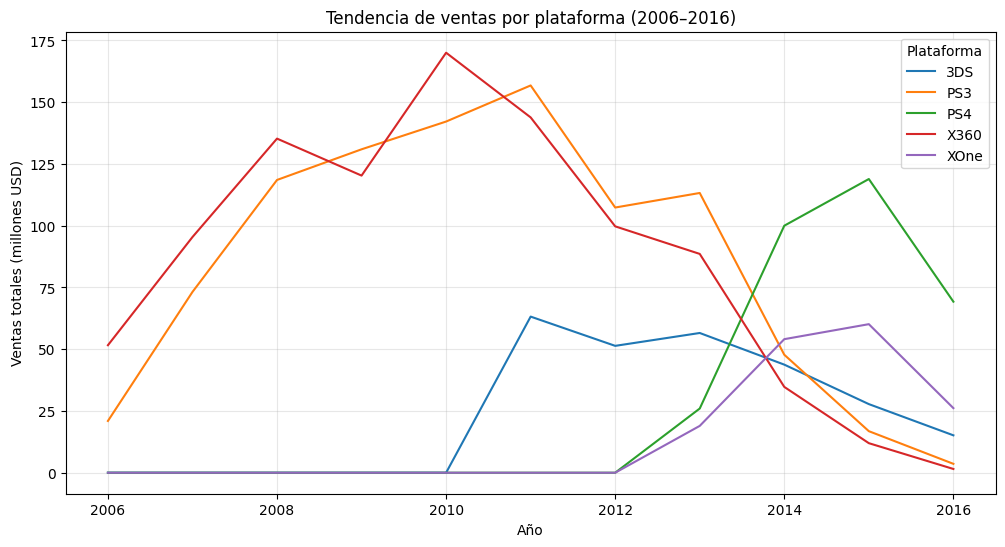

In [13]:
plataformas_principales = ['PS3', 'PS4', 'X360', 'XOne', '3DS']

trend = (proyeccion_2027[proyeccion_2027['platform'].isin(plataformas_principales)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0))

trend.plot(kind='line', figsize=(12,6))
plt.title('Tendencia de ventas por plataforma (2006–2016)')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones USD)')
plt.legend(title='Plataforma', loc='upper right')
plt.grid(alpha=0.3)
plt.show()

### Serían las 5 plataformas en las que invertiría en juegos para el siguiente año

### Pero, veamos las ventas de todas las plataformas en una gráfica de caja:

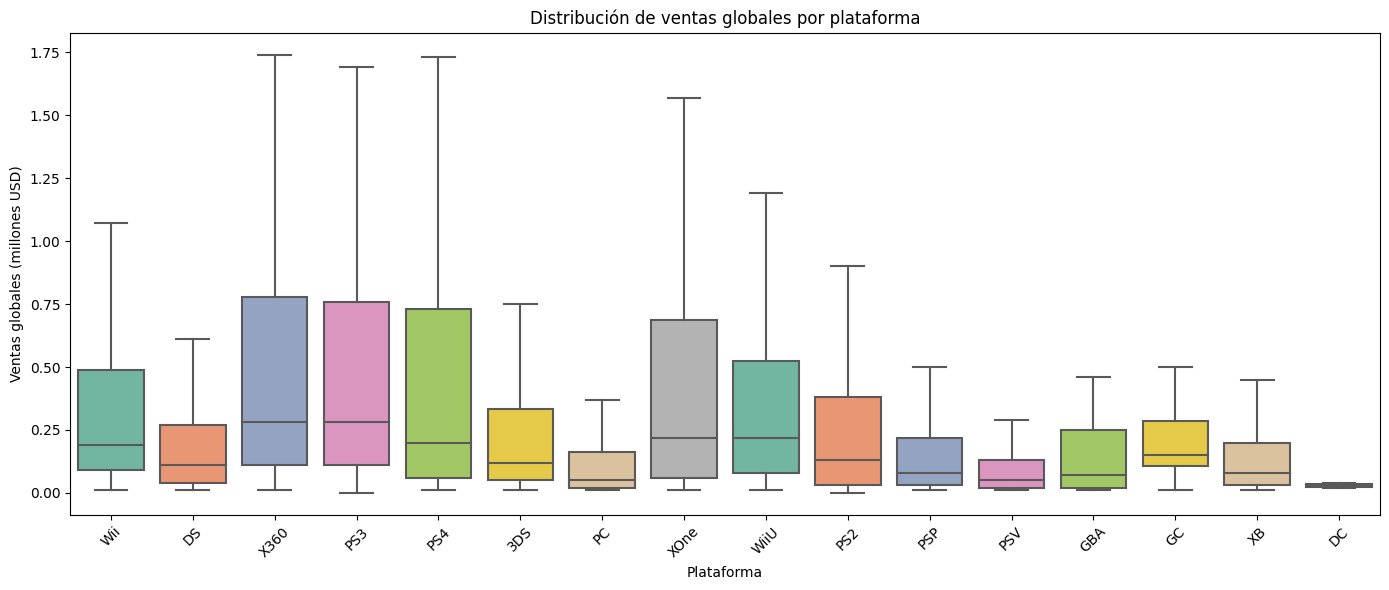

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(data = proyeccion_2027, x='platform', y='total_sales', showfliers=False, palette='Set2') #Crea el gráfico de cajas ocultando los valores atipicos

plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observaciones:

- Muy parecidas las ventas de la X360 y la PS3, plataformas con la mediana mayor.
- Las 5 plataformas con la mayor tendencia de ventas de los últimos 3 años, tienen la mayor variablidad, así como los juegos con más ventas.
- Para los juegos de menos ventas (bigotes inferiores) no se observa mucha diferencia.
- Sorprende la PC, con 31 años en el mercado, su mediana, variabilidad y el juego con más ventas es de las valores más pequeños. Supongo que los juegos son de precios más bajos.
- Para la DC, ¿cuántos juegos salieron al mercado?

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>


El plot es excelente! Aunque podrías profundizar mucho más tu análisis.

Un **boxplot** (o diagrama de caja y bigotes) es una herramienta gráfica que permite visualizar la distribución de un conjunto de datos de manera eficiente. Sus principales beneficios son:

1. **Resumir la distribución de los datos** → Muestra la mediana, cuartiles y valores extremos de un conjunto de datos de forma compacta.
2. **Detectar outliers fácilmente** → Los valores atípicos quedan representados fuera de los "bigotes", facilitando su identificación.
3. **Comparar distribuciones** → Útil para analizar cómo varían los datos entre diferentes categorías o grupos.
4. **Mostrar asimetría y dispersión** → Permite observar si los datos están sesgados y qué tan dispersos están.
5. **Resistencia a valores extremos** → No se ve tan afectado por outliers como otras visualizaciones, como histogramas o medias.

</div>

### Veamos con números lo anterior:

In [15]:
metricas_ventas = (proyeccion_2027.groupby('platform')['total_sales'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False).round(2)) #
print(metricas_ventas)

          mean  median  count
platform                     
PS4       0.80    0.20    392
X360      0.78    0.28   1214
PS3       0.71    0.28   1306
Wii       0.69    0.19   1286
XOne      0.65    0.22    247
WiiU      0.56    0.22    147
3DS       0.50    0.12    512
DS        0.33    0.11   1979
PS2       0.33    0.13    805
GC        0.26    0.15     44
PSP       0.22    0.08   1083
PC        0.21    0.05    776
GBA       0.19    0.07     45
XB        0.16    0.08     66
PSV       0.13    0.05    429
DC        0.03    0.03      2


### Se corrobora las observaciones anteriores.

### ¿Será que las reseñas de usuarios y profesionales afecten las ventas? Analizemos con la de mayor venta en los últimos 3 años (PS4)

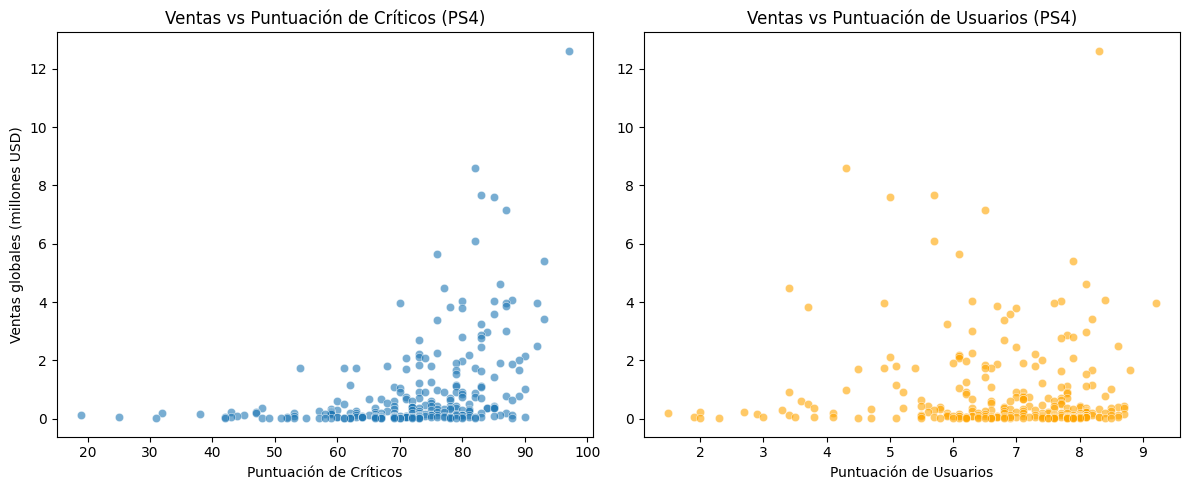

In [16]:
ps4 = proyeccion_2027[proyeccion_2027['platform'] == 'PS4'].copy() #Filtramos sólo las filas de PS4

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4, x='critic_score', y='total_sales', alpha=0.6)  #Crea un gráfico de dispersión con la puntuación de los críticos
plt.title('Ventas vs Puntuación de Críticos (PS4)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas globales (millones USD)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4, x='user_score', y='total_sales', alpha=0.6, color='orange') #Crea un gráfico de dispersión con la puntuación de los usuarios
plt.title('Ventas vs Puntuación de Usuarios (PS4)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('')

plt.tight_layout()
plt.show()

### De forma general sí se observan mayor dispersión de ventas en puntuaciones más altas en ambos gráficos (los puntos están cargados a la derecha, aunque, casi en su totalidad muy abajo de la gráfica). La de los críticos se observa aún más esa tendencia hacia puntuaciones más altas mayores ventas.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Tal cual. Podemos ver una correlación positiva para las reseñas de los críticos, es decir, un puntaje más alto generalmente trae más ingresos. Sin embargo, la correlación entre el puntaje de los usuarios y los ingresos es casi cero, lo que significa que los ingresos por ventas no se ven muy afectados por la opinión de los usuarios.

</div>

### Corroboremos con un ejercicio de correlación:

In [17]:
correlacion_criticos = ps4['critic_score'].corr(ps4['total_sales'])
correlacion_usuarios = ps4['user_score'].corr(ps4['total_sales'])

print(f"Correlación Críticos–Ventas (PS4): {correlacion_criticos:.2f}")
print(f"Correlación Usuarios–Ventas (PS4): {correlacion_usuarios:.2f}")

Correlación Críticos–Ventas (PS4): 0.41
Correlación Usuarios–Ventas (PS4): -0.03


### La correlación entre las reseñas de los críticos en moderada, tienden a vender más los juegos con puntuaciones altas. Mientras que con las reseñas de los usuarios es baja la correlación, al parecer no influye mucho en las ventas.

### Observemos las ventas por plataforma de los juegos vendidos en distintas plataformas:

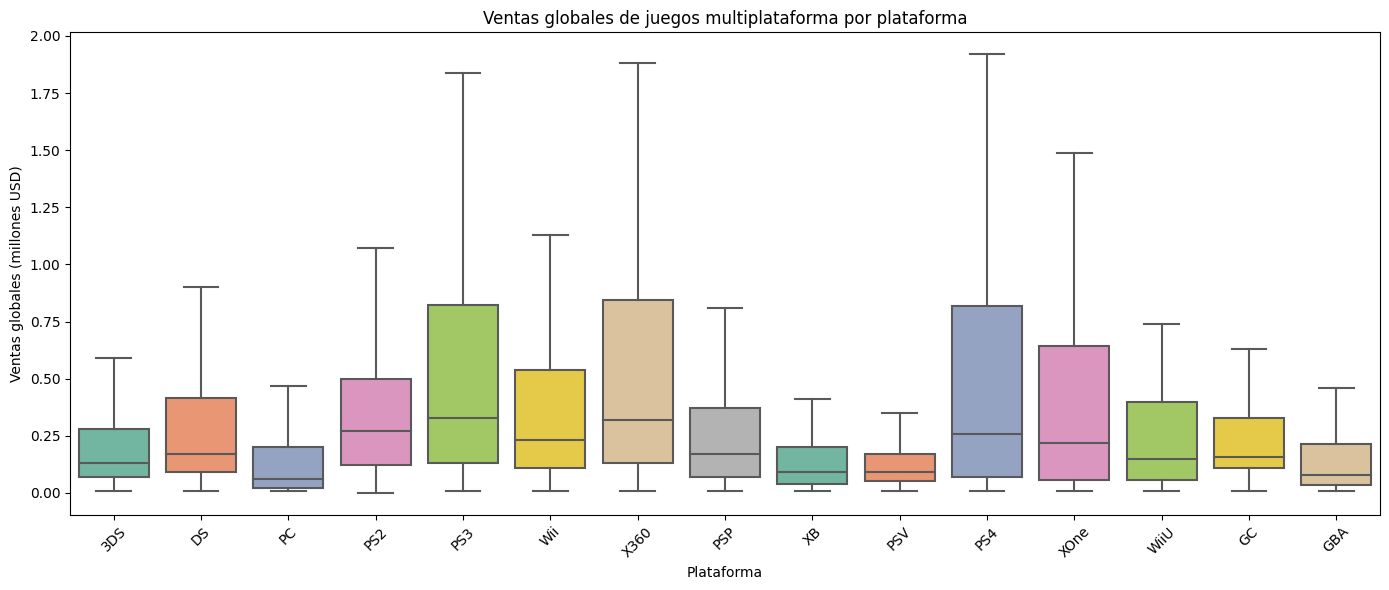

In [18]:
juegos_por_plataforma = proyeccion_2027.groupby('name')['platform'].nunique() #Cuenta los juego por plataforma
juegos_multi_plataforma = juegos_por_plataforma[juegos_por_plataforma > 1].index #Filtra los que aparecen en más de una plataforma
juegos_multi_data = proyeccion_2027[proyeccion_2027['name'].isin(juegos_multi_plataforma)].copy() #Crea un subconjunto del dataset con esos juegos

ventas_multi = (juegos_multi_data.groupby(['name', 'platform'])['total_sales'].sum().reset_index()) #Agrupa por nombre y plataforma sumando las ventas 

plt.figure(figsize=(14,6))
sns.boxplot(data = ventas_multi, x='platform', y='total_sales', palette='Set2', showfliers=False) #Crea el gráfico de cajas
plt.title('Ventas globales de juegos multiplataforma por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Se observa la misma tendencia de las ventas globales por plataforma.

### Observemos numéricamente el promedio de las ventas:

In [19]:
media_ventas_multi = (ventas_multi.groupby('platform')['total_sales'].mean().sort_values(ascending=False).round(2)) #Agrupa el promedio de ventas por plataforma

print(media_ventas_multi.head(10))

platform
PS4     0.87
X360    0.80
PS3     0.76
XOne    0.60
Wii     0.51
PS2     0.47
DS      0.36
PSP     0.31
3DS     0.31
WiiU    0.30
Name: total_sales, dtype: float64


### El promedio mayor de ventas con juegos multi plataforma son las mismas top 5 que las ventas globales generales.

### Veamos cuanto juegos hay por género en una gráfica de barras:

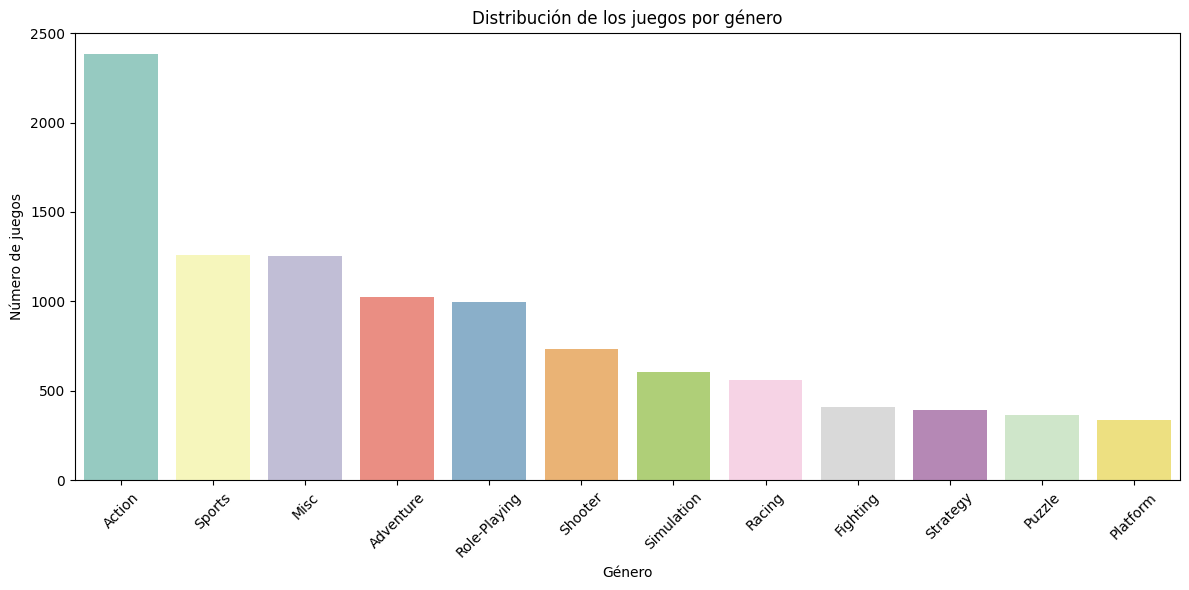

In [20]:
por_genero = (proyeccion_2027['genre'].value_counts().reset_index().rename(columns={'index': 'genre', 'genre': 'count'})) #Agrupa por género la cantidad de juegos

plt.figure(figsize=(12,6))
sns.barplot(data=por_genero, x='genre', y='count', palette='Set3') #Crea la gráfica de barras
plt.title('Distribución de los juegos por género')
plt.xlabel('Género')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.tight_layout()

### Se observa que la mayor cantidad de juegos son de acción, seguido de deportes y de varios, estos 2 últimos prácticamente con la misma cantidad de juegos.

### Veamos las ventas por género:

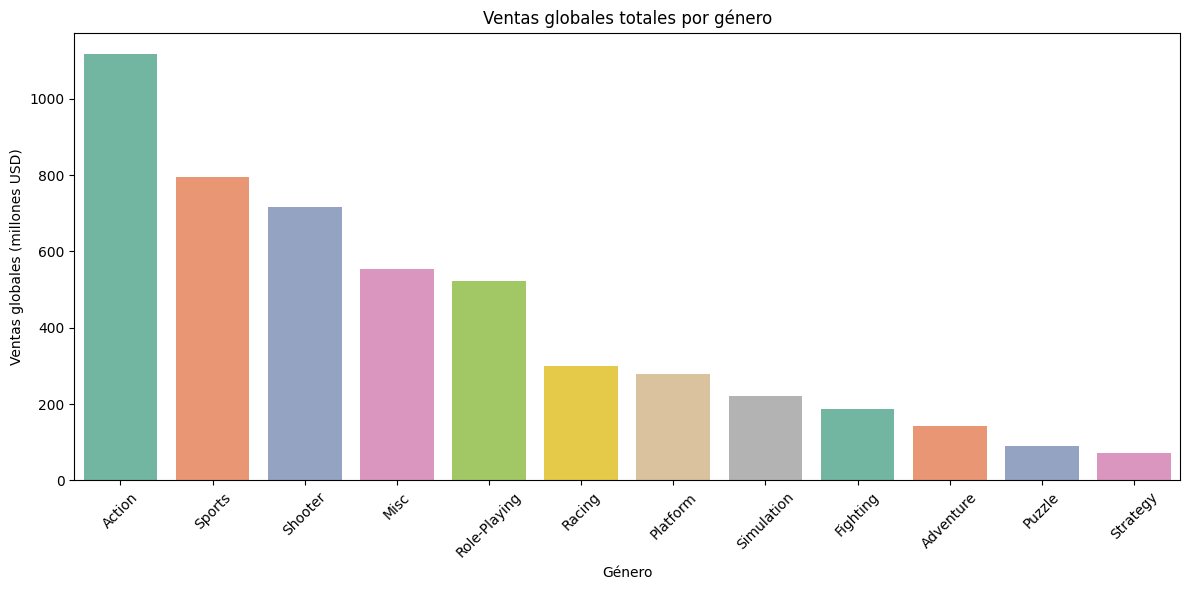

In [21]:
ventas_por_genero = (proyeccion_2027.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()) #Agrupa las ventas por género

plt.figure(figsize=(12,6))
sns.barplot(data=ventas_por_genero, x='genre', y='total_sales', palette='Set2') #Crea la gráfica de barras
plt.title('Ventas globales totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observaciones:

- Nuevamente los 2 primeros géneros sonn de acción y de deportes, aunque ya no se observa a la mitad de esta última.
- En 3° lugar se observan los juegos de disparo que en el gráfico de cantidad de juegos se encontraba en la 6° posición, interesante.
- Mientras que los de aventura que están en la 4° posición de cantidad de juegos, en la gráfica de ventas cae hasta la 10° posición, invirtiría muy poco en ese género.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Todos los gráficos y conclusiones son correctos. 

</div>

## Perfil de usuario por región

### En este apartado, estudiaremos las ventas por región:

In [22]:
ventas_por_region = (proyeccion_2027.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)) #Calcula las ventas por plataforma y región

ventas_por_region.head(10)

,na_sales,eu_sales,jp_sales
platform,,,
X360,588.84,267.89,12.02
Wii,486.87,258.32,68.28
PS3,390.13,327.21,79.41
DS,323.99,142.99,141.49
PS2,114.89,46.28,35.93
PS4,108.74,141.09,15.96
XOne,93.12,51.59,0.34
3DS,82.65,61.27,100.62
PSP,80.54,54.21,70.63


### Observemos visualmente el top 5 de plataformas por región:

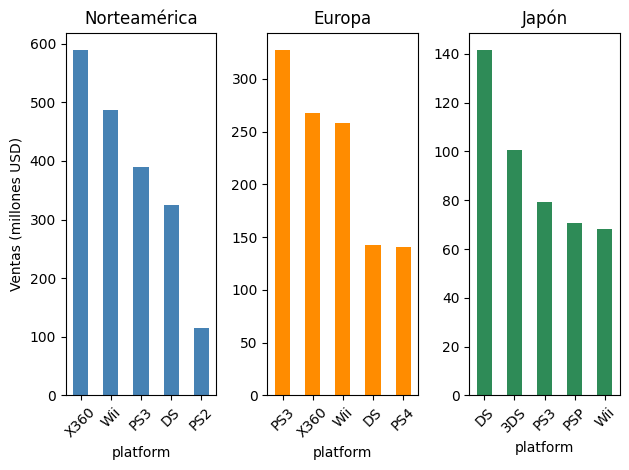

In [23]:
top5_na = ventas_por_region['na_sales'].sort_values(ascending=False).head() #Determina las 5 plataformas principales en Norteamérica
top5_eu = ventas_por_region['eu_sales'].sort_values(ascending=False).head() #Determina las 5 plataformas principales en Europa
top5_jp = ventas_por_region['jp_sales'].sort_values(ascending=False).head() #Determina las 5 plataformas principales en Japón

plt.subplot(1,3,1)
top5_na.plot(kind='bar', color='steelblue') #Crea la gráfica para Norteamérica
plt.title('Norteamérica')
plt.ylabel('Ventas (millones USD)')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
top5_eu.plot(kind='bar', color='darkorange') #Crea la gráfica para Europa
plt.title('Europa')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
top5_jp.plot(kind='bar', color='seagreen') #Crea la gráfica para Japón
plt.title('Japón')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Observaciones:

- Para Norteamérica y Europa las 4 plataformas principales son las mismas, aunque en Norteamérica predomina el X360 mientras que en Europa lo hace El PS3.
- Para Japón se observa que predominan las plataformas portátiles.
- En Norteamérica se observa mayor volumen de ventas.

### Veamos la proporción:

In [24]:
proporcion_region = ventas_por_region.div(ventas_por_region.sum(), axis=1) * 100 # Calcula la proporción total por región
proporcion_region.head(10)

,na_sales,eu_sales,jp_sales
platform,,,
X360,24.672033,17.907086,2.141419
Wii,20.399553,17.267380,12.164401
PS3,16.346206,21.872326,14.147263
DS,13.574981,9.558155,25.207105
PS2,4.813820,3.093583,6.401097
PS4,4.556139,9.431150,2.843349
XOne,3.901671,3.448529,0.060573
3DS,3.462984,4.095588,17.925923
PSP,3.374576,3.623663,12.583065


### Observaciones:

- El porcentaje de ventas de la plataforma principal en Norteamérica y Japón son similares.
- En Norteamérica haya una tendencia de disminución de porcentaje en el top 4 de las plataformas con mayor venta.
- PS3 tiene buen porcentaje de ventas en las 3 regiones.

### Veamos ahora las ventas por género para cada región:

In [25]:
ventas_region_genero = (proyeccion_2027.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)) #Calcula las ventas por género y región

ventas_region_genero.head(10)

,na_sales,eu_sales,jp_sales
genre,,,
Action,530.44,350.70,102.07
Sports,396.64,251.55,48.97
Shooter,373.13,238.89,19.35
Misc,285.06,146.88,64.53
Role-Playing,199.63,110.62,170.38
Platform,134.25,81.62,35.20
Racing,132.93,113.39,13.20
Simulation,107.79,69.74,23.31
Fighting,94.31,42.63,28.61


### Veamos visualmente los 5 géneros de mayor venta por región:

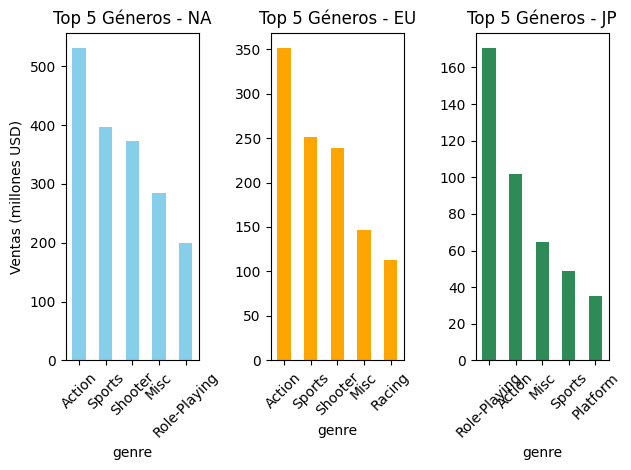

In [26]:
top5_na_generos = ventas_region_genero['na_sales'].sort_values(ascending=False).head() #Determina los 5 géneros principales en Norteamérica
top5_eu_generos = ventas_region_genero['eu_sales'].sort_values(ascending=False).head() #Determina los 5 géneros principales en Europa
top5_jp_generos = ventas_region_genero['jp_sales'].sort_values(ascending=False).head() #Determina los 5 géneros principales en Japón

plt.subplot(1,3,1)
top5_na_generos.plot(kind='bar', color='skyblue') #Crea la gráfica para Norteamérica
plt.title('Top 5 Géneros - NA')
plt.ylabel('Ventas (millones USD)')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
top5_eu_generos.plot(kind='bar', color='orange') #Crea la gráfica para Europa
plt.title('Top 5 Géneros - EU')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
top5_jp_generos.plot(kind='bar', color='seagreen') #Crea la gráfica para Japón
plt.title('Top 5 Géneros - JP')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al analizar plataformas y géneros, todo lo que no esté incluido en el TOP-5 podría combinarse en "otros", para que la imagen del análisis sea más completa.

</div>

### Observaciones:

- Para Norteamérica y Europa siguen las misma tendencia de ventas general por género.
- En las 3 regiones, el género acción es el más vendido.

### Determinemos si las ventas son afectadas por las clasificaciones de ESRB:

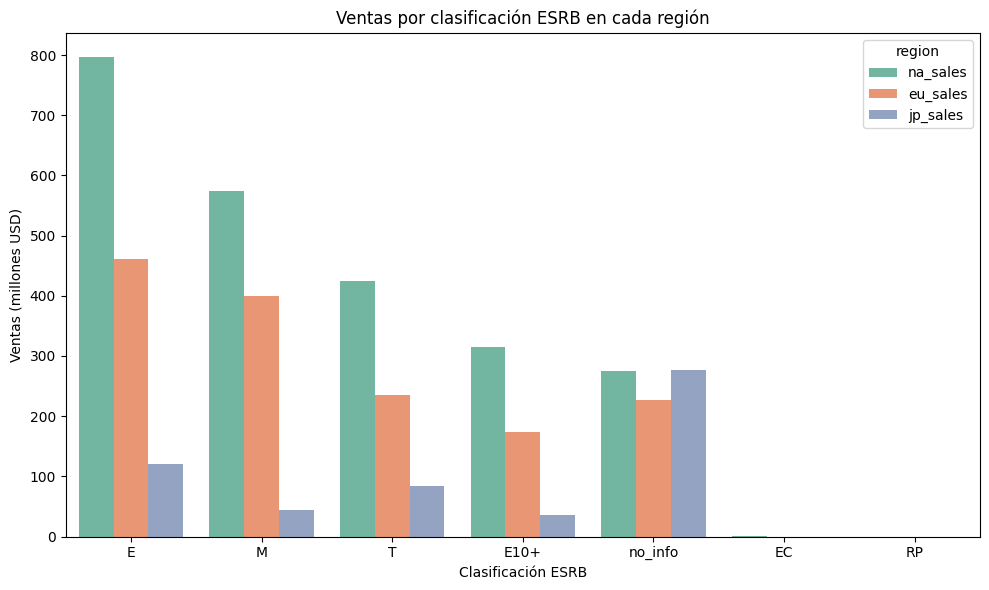

In [27]:
ventas_por_esrb = (proyeccion_2027.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)) #Calcula las ventas por rating y región

grafico_ventas_por_esrb = ventas_por_esrb.reset_index().melt(id_vars='rating', var_name='region', value_name='sales') #Transforma el DataFrame

plt.figure(figsize=(10,6))
sns.barplot(data = grafico_ventas_por_esrb, x='rating', y='sales', hue='region', palette='Set2') #Crea el gráfico de barras
plt.title('Ventas por clasificación ESRB en cada región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones USD)')
plt.tight_layout()
plt.show()

### Observaciones:

- Para Norteamérica predominan las ventas con clasificación 'Todos (E)' y 'Maduro (M)'.
- Para Europa es similar la tendencia de Norteamérica, aunque hay mayor equilibrio entre las 2 primeras clasificaciones.
- Para Japón predominan las ventas de 'Todos (E)' y 'Adolescentes (T)', aunque la mayoría de ventas los juegos no tienen clasificación ESRB.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El análisis realizado por cada región está muy bien fundamentado. Además, los resultados se presentan de forma clara y ordenada, lo que facilita la comprensión de la información. Esto permite identificar rápidamente las diferencias y similitudes entre cada región, y contribuye a un mejor entendimiento de los patrones generales. 


</div>

## Pruebas de hipótesis

### En esta sección probaremos las hipótesis considerando, que las poblaciones son independientes y utilizaremos un gráfico de 2 colas.

- H0: Las clasificaciones promedio de los usuarios para XOne y PC son las mismas (cal_xone = cal_pc)
- H1: Las clasificaciones promedio de los usuarios para XOne y PC son diferentes (cal_xone != cal_pc)

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has definido correctamente las hipótesis.

</div>

In [28]:
cal_xone = proyeccion_2027.loc[proyeccion_2027['platform'] == 'XOne', 'user_score'].dropna() #Filtra las calificaciones de XOne y elimina valores nulos
cal_pc = proyeccion_2027.loc[proyeccion_2027['platform'] == 'PC', 'user_score'].dropna() #Filtra las calificaciones de PC y elimina valores nulos

alpha = .05 #Valor de alpha
resultados = st.ttest_ind(cal_xone, cal_pc, equal_var=False) #Prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', resultados.pvalue)

if (resultados.pvalue < alpha):#Compara los valores p obtenidos con el nivel de significación estadística
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.01014021353497224
Rechazamos la hipótesis nula


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

### Hay diferencia significativa de que las medias de las calificaciones de los usuarios entre la Xbox One y la PC son distintas.

### Siguiendo las mismas condiciones:

- H0: Las clasificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas (cal_accion = cal_deportes)
- H1: Las clasificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes (cal_accion != cal_deportes)

In [29]:
cal_accion = proyeccion_2027.loc[proyeccion_2027['genre'] == 'Action', 'user_score'].dropna() #Filtra las calificaciones de Acción y elimina valores nulos
cal_deportes = proyeccion_2027.loc[proyeccion_2027['genre'] == 'Sports', 'user_score'].dropna() #Filtra las calificaciones de Deportes y elimina valores nulos

alpha = .05 #Valor de alpha
results = st.ttest_ind(cal_accion, cal_deportes, equal_var=False) #Prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', results.pvalue)

if (results.pvalue < alpha): #Compara los valores p obtenidos con el nivel de significación estadística
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 5.319061853268226e-10
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>
Los resultados obtenidos son coherentes con lo esperado. Muy buen trabajo aplicando las pruebas de hipótesis!

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>
He notado que hay fragmentos de código repetidos en ambos procesos. Sería recomendable encapsularlos en funciones para mejorar la reutilización y mantener un código más limpio y modular.
</div>

</div>

### Hay diferencia significativa de que las medias de las calificaciones de los usuarios entre los géneros de Acción y Deportes son distintas.

## Conclusiones

### De acuerdo a la información obtenida, se recomienda:

- Invertir en mayor proporcións en juegos de las 4 plataformas con mayor volumen ventas en Norteamérica y Europa: PS4, XOne, Wii y DS.
- En Japón invertiría en juegos de plataformas portátiles.
- De acuerdo al género lo idela es invertir en juegos de acción y deportes en las 3 regiones.
- No considerar importante si los juegos son multiplataforma o la clasificación de los usuarios.
- Considerar moderadamente importante los juegos con clasificaiones altas por parte de los críticos.
- Tener en cuenta juegos con clasificaciones E, M y T para las 3 regiones. 